In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns



In [100]:

def choose_statistic(x, sample_stat_text,unbiased = False):
  # calculate mean if the text is "Mean"
  ddof = 0
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    if unbiased:
      ddof = 1
    return np.var(x,ddof = ddof)
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()

def sampling_distribution(population_data, samp_size, stat, unbiased = False):
  # list that will hold all the sample statistics
  sample_stats = []
  
  for i in range(500):
    # get a random sample from the population of size samp_size
      
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat,unbiased=unbiased)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat,unbiased=unbiased),2)
  
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()
  return samp

In [101]:

spotify_data = pd.read_csv('genres_v2.csv')
spotify_data2 = pd.read_csv('playlists.csv')
pre = spotify_data.head(1)
pre2 =spotify_data2.head(1)

C:\Users\Roman.Prylypko\AppData\Local\Temp\ipykernel_1676\2614221936.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify_data = pd.read_csv('genres_v2.csv')


In [102]:
pre.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

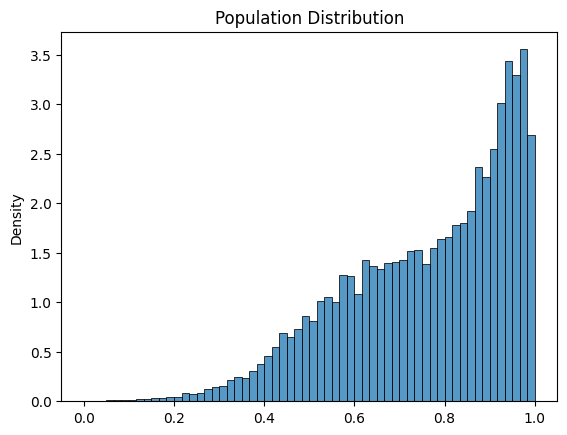

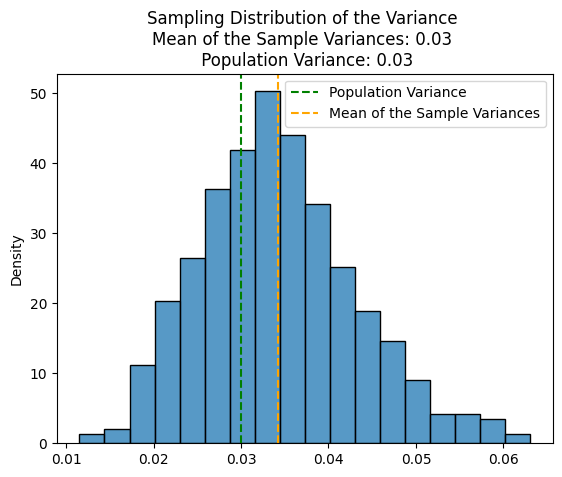

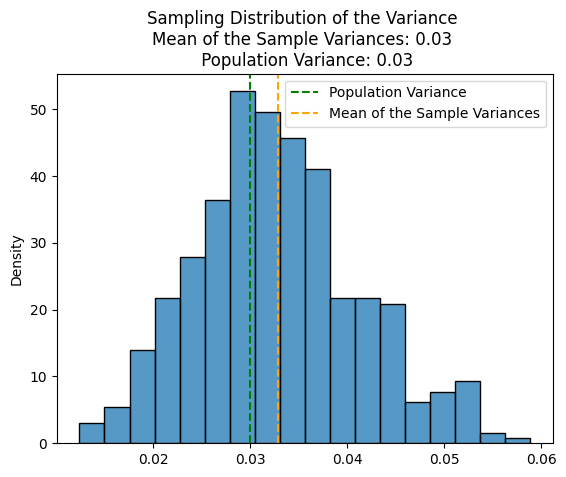

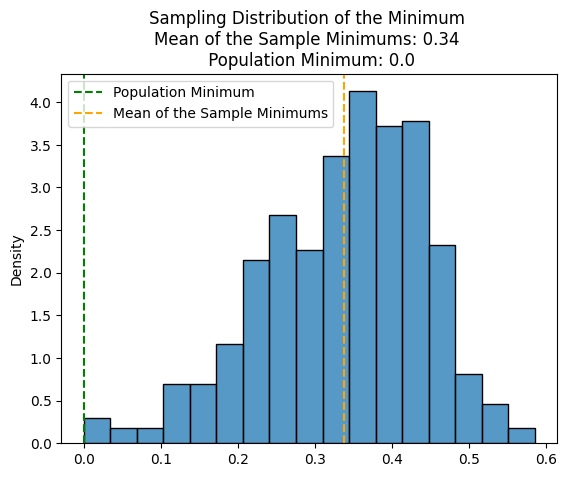

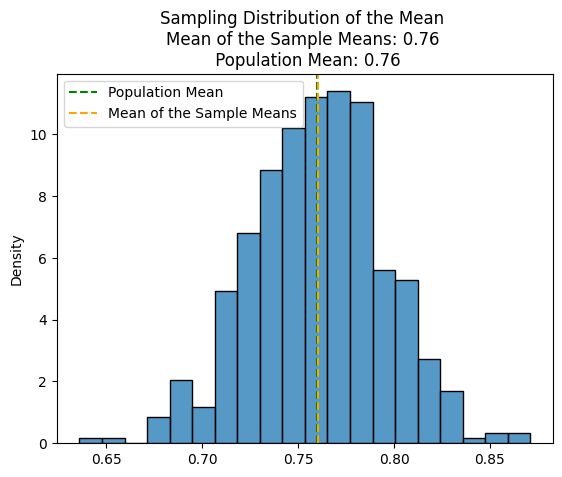

<Figure size 640x480 with 0 Axes>

In [103]:
sample_size=30
song_tempos = spotify_data.energy
result_tempo = song_tempos.describe()
var_tempo = choose_statistic(song_tempos,'Variance')
population_distribution(song_tempos)
sampling_distribution(song_tempos,sample_size,'Variance',unbiased= True)
sampling_distribution(song_tempos,sample_size,'Variance',unbiased= False)
sampling_distribution(song_tempos,sample_size,'Minimum')
samp = sampling_distribution(song_tempos,sample_size,'Mean')

In [106]:
samp_mean = samp.mean()
samp_var = samp.var()
samp_std = samp.std()
population_mean = result_tempo['mean']
population_std = result_tempo['std']
std_err_onpop  = population_std/(sample_size**0.5)
std_err_onsample  = samp_std/(sample_size**0.5)#якщо невідомі характеристики генеральної сукупності
proba_onpop = stats.norm.cdf(0.5,population_mean,population_std)
proba_onsample = stats.norm.cdf(0.5,samp_mean,samp_std)
proba_onpop_higher = 1 - stats.norm.cdf(0.5,population_mean,population_std)
proba_onsample_higher = 1 - stats.norm.cdf(0.5,samp_mean,samp_std)

In [107]:
proba_onpop_higher

0.92336672151028